## ECGR 5106 - HW 2



## Problem 2

2.a. What happens if we need to standardize the continuous numerical features like what we have done in this section?

Answer: Standardization is performed on continuous numerical features if the features in the dataset have differences between their ranges or if the features are measured in different units. So, to avoid the data from producing misleading results, standardization should be performed. For the Housing dataset, features like the LotFrontage and LotArea, both have different ranges of the values and to avoid this data from producing the wrong output, standardization should be perfomed.

2.b. For Problem 2, Part b, the score will be improved by improving the model complexity. The training results will be plotted and compared against the baseline model.

In [1]:
!pip install d2l==1.0.0b0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.6/141.6 KB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 KB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 23.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.6/155.6 KB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 KB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.3 MB/s eta 0:00:00
  Created wheel for gym: filename=gym-0.21.0-py3-none-any.whl size=1616825 sha256=2149f31e7054e5b5002068ac5490e133d9f488b193cafc478a26f0509e660856
  Stored in directory: /root/.cache/pip/wheels/27/6d/b3/a3a6e10704795c9b9000f1ab2dc480dfe7bed42f5972806e73
Successfully built gym
  Attempting uninstal

In [2]:
# Importing all the Necessary Libraries

%matplotlib inline
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import time
import torchvision
import torch.nn.functional as F   
from torchvision import transforms
from d2l import torch as d2l
from torch import nn

import torch
torch.__version__
# torch.cuda.current_device()
# torch.cuda.get_device_name(0)

d2l.use_svg_display()

# Code Snippet to Ignore Warning

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [3]:
# Downloading and Caching the Housing Dataset from Kaggle
class KaggleHouse(d2l.DataModule):
    def __init__(self, batch_size, train=None, val=None):
        super().__init__()
        self.save_hyperparameters()
        if self.train is None:
            self.raw_train = pd.read_csv(d2l.download(
                d2l.DATA_URL + 'kaggle_house_pred_train.csv', self.root,
                sha1_hash='585e9cc93e70b39160e7921475f9bcd7d31219ce'))
            self.raw_val = pd.read_csv(d2l.download(
                d2l.DATA_URL + 'kaggle_house_pred_test.csv', self.root,
                sha1_hash='fa19780a7b011d9b009e8bff8e99922a8ee2eb90'))

In [4]:
# Loading the Dataset
data = KaggleHouse(batch_size = 64)
print(data.raw_train.shape)
print(data.raw_val.shape)

(1460, 81)
(1459, 80)


In [5]:
# Visualizing the raw Dataset without any Preprocessing done
data.raw_train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [6]:
@d2l.add_to_class(KaggleHouse)
def preprocess(self):
    # Removing the ID and label columns
    label = 'SalePrice'
    features = pd.concat(
        (self.raw_train.drop(columns=['Id', label]),
         self.raw_val.drop(columns=['Id'])))
    
    # Standardizing the numerical columns
    numeric_features = features.dtypes[features.dtypes != 'object'].index
    features[numeric_features] = features[numeric_features].apply(
        lambda x: (x - x.mean()) / (x.std()))
    
    # Replacing NAN numerical features by 0
    features[numeric_features] = features[numeric_features].fillna(0)
    
    # Replacing discrete features by one-hot encoding.
    features = pd.get_dummies(features, dummy_na=True)
    
    # Saving preprocessed features
    self.train = features[:self.raw_train.shape[0]].copy()
    self.train[label] = self.raw_train[label]
    self.val = features[self.raw_train.shape[0]:].copy()

In [7]:
# Preprocessing the Data
data.preprocess()
print(data.train.shape)
print(data.val.shape)

(1460, 332)
(1459, 331)


In [8]:
# Visualizing the Preprocessed Data
data.train

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0       0.067320    -0.184443 -0.217841     0.646073    -0.507197   1.046078   
1      -0.873466     0.458096 -0.072032    -0.063174     2.187904   0.154737   
2       0.067320    -0.055935  0.137173     0.646073    -0.507197   0.980053   
3       0.302516    -0.398622 -0.078371     0.646073    -0.507197  -1.859033   
4       0.067320     0.629439  0.518814     1.355319    -0.507197   0.947040   
...          ...          ...       ...          ...          ...        ...   
1455    0.067320    -0.312950 -0.285421    -0.063174    -0.507197   0.914028   
1456   -0.873466     0.672275  0.381246    -0.063174     0.391170   0.220763   
1457    0.302516    -0.141607 -0.142781     0.646073     3.086271  -1.000704   
1458   -0.873466    -0.055935 -0.057197    -0.772420     0.391170  -0.703591   
1459   -0.873466     0.243916 -0.029303    -0.772420     0.391170  -0.208401   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_WD  \
0         0.896679    0.523038    0.580708   -0.293030  ...            1   
1        -0.395536   -0.569893    1.177709   -0.293030  ...            1   
2         0.848819    0.333448    0.097840   -0.293030  ...            1   
3        -0.682695   -0.569893   -0.494771   -0.293030  ...            1   
4         0.753100    1.381770    0.468770   -0.293030  ...            1   
...            ...         ...         ...         ...  ...          ...   
1455      0.753100   -0.569893   -0.968860   -0.293030  ...            1   
1456      0.178782    0.093673    0.765076    0.670295  ...            1   
1457      1.040259   -0.569893   -0.365275   -0.293030  ...            1   
1458      0.561660   -0.569893   -0.861312    5.788329  ...            1   
1459     -0.921995   -0.569893    0.852870    1.420862  ...            1   

      SaleType_nan  SaleCondition_Abnorml  SaleCondition_AdjLand  \
0                0                      0                      0   
1                0                      0                      0   
2                0                      0                      0   
3                0                      1                      0   
4                0                      0                      0   
...            ...                    ...                    ...   
1455             0                      0                      0   
1456             0                      0                      0   
1457             0                      0                      0   
1458             0                      0                      0   
1459             0                      0                      0   

      SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                        0                     0                     1   
1                        0                     0                     1   
2                        0                     0                     1   
3                        0                     0                     0   
4                        0                     0                     1   
...                    ...                   ...                   ...   
1455                     0                     0                     1   
1456                     0                     0                     1   
1457                     0                     0                     1   
1458                     0                     0                     1   
1459                     0                     0                     1   

      SaleCondition_Partial  SaleCondition_nan  SalePrice  
0                         0                  0     208500  
1                         0                  0     181500  
2                         0                  0     223500  
3                         0                  0     140000  
4                         0                  0     250000  
...                     ...                ...        ...  
1455  

In [9]:
# Creation of a Dataloader Function 
@d2l.add_to_class(KaggleHouse)
def get_dataloader(self, train):
    label = 'SalePrice'
    data = self.train if train else self.val
    if label not in data: return
    get_tensor = lambda x: torch.tensor(x.values, dtype=torch.float32)
    # Logarithm of prices
    tensors = (get_tensor(data.drop(columns=[label])),  # X
               torch.log(get_tensor(data[label])).reshape((-1, 1)))  # Y
    return self.get_tensorloader(tensors, train)


In [26]:
# Defining the the l2 Norm Penalty for Weight Decay
def l2_penalty(w):
  return (w ** 2).sum() / 2

class LinearRegression(d2l.Module):
    def __init__(self, lr):
        self.save_hyperparameters()
        self.net = nn.LazyLinear(512),
        self.net.ReLU(),
        self.net.Dropout(0.7),
        self.net.LazyLinear(256),
        self.net.ReLU(),
        self.net.Dropout(0.7),
        self.net.LazyLinear(128),
        self.net.ReLU(),
        self.net.Dropout(0.7),
        self.net.LazyLinear(64),
        self.net.ReLU(),
        self.net.Dropout(0.7),
        self.net.weight.data.normal_(0.5, 0.5),
        self.net.bias.data.fill_(0)

@d2l.add_to_class(LinearRegression) 
def forward(self, X):
    """The linear regression model."""
    return self.net(X)

   # Defining the Loss Function with Penalty Added
    def loss(self, Y_hat, Y, averaged = True):
      Y_hat = Y_hat.reshape((-1, Y_hat.shape[-1]))
      Y = Y.reshape((-1))
      return (super().loss(Y_hat, Y) +
              self.wd * l2_penalty(self.weights))

@d2l.add_to_class(LinearRegression) 
def configure_optimizers(self):
    return torch.optim.SGD(self.parameters(), self.lr)

In [27]:
def k_fold_data(data, k):
    rets = []
    fold_size = data.train.shape[0] // k
    for j in range(k):
        idx = range(j * fold_size, (j+1) * fold_size)
        rets.append(KaggleHouse(data.batch_size, data.train.drop(index=idx),
                                data.train.loc[idx]))
    return rets

In [28]:
def k_fold(trainer, data, k, lr):
    val_loss, models = [], []
    for i, data_fold in enumerate(k_fold_data(data, k)):
        model = d2l.LinearRegression(lr)
        model.board.yscale='log'
        if i != 0: model.board.display = False
        trainer.fit(model, data_fold)
        val_loss.append(float(model.board.data['val_loss'][-1].y))
        models.append(model)
    print(f'Average Validation Log MSE = {sum(val_loss)/len(val_loss)}')
    return models

Average Validation Log MSE = 0.10593540196617444


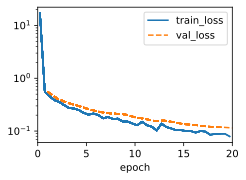

In [33]:
# Plotting the Complex model with both Dropout and Weight Decay 
trainer = d2l.Trainer(max_epochs=20)
models = k_fold(trainer, data, k=15, lr=0.01)

In [30]:
# Plotting the Complex model with both Dropout and Weight Decay 
trainer = d2l.Trainer(max_epochs=250)
models = k_fold(trainer, data, k=15, lr=0.01)

Average Validation Log MSE = 0.028771702541659276


In [32]:
# Getting the .csv File ready for submission on Kaggle
preds = [model(torch.tensor(data.val.values, dtype=torch.float32))
         for model in models]
# Taking exponentiation of predictions in the logarithm scale
ensemble_preds = torch.exp(torch.cat(preds, 1)).mean(1)
submission = pd.DataFrame({'Id':data.raw_val.Id,
                           'SalePrice':ensemble_preds.detach().numpy()})
submission.to_csv('submission.csv', index=False)